In [11]:
# coding: utf-8
import sys
sys.path.append('../예제/')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss
import numpy
import time
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot

In [5]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

target : [[0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]]
contexts : [[[1 0 0 0 0 0 0]
  [0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]
  [0 0 0 0 0 1 0]]

 [[0 0 0 1 0 0 0]
  [0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]
  [0 0 0 0 0 0 1]]]
| 에폭 1 |  반복 1 / 1 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 1 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 1 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 1 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 1 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 1 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 1 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 1 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 1 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 1 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 1 | 시간 0[s] | 손실 1.95
| 에폭 12 |  반복 1 / 1 | 시간 0[s] | 손실 1.95
| 에폭 13 |  반복 1 / 1 | 시간 0[s] | 손실 1.95
| 에폭 14 |  반복 1 / 1 | 시간 0[s] | 손실 1.95
| 에폭 15 |  반복 1 / 1 | 시간 0[s] | 손실 1.95
| 에폭 16 |  반복 1 / 1 | 시간

| 에폭 322 |  반복 1 / 1 | 시간 0[s] | 손실 1.36
| 에폭 323 |  반복 1 / 1 | 시간 0[s] | 손실 1.45
| 에폭 324 |  반복 1 / 1 | 시간 0[s] | 손실 1.43
| 에폭 325 |  반복 1 / 1 | 시간 0[s] | 손실 1.45
| 에폭 326 |  반복 1 / 1 | 시간 0[s] | 손실 1.33
| 에폭 327 |  반복 1 / 1 | 시간 0[s] | 손실 1.43
| 에폭 328 |  반복 1 / 1 | 시간 0[s] | 손실 1.32
| 에폭 329 |  반복 1 / 1 | 시간 0[s] | 손실 1.42
| 에폭 330 |  반복 1 / 1 | 시간 0[s] | 손실 1.42
| 에폭 331 |  반복 1 / 1 | 시간 0[s] | 손실 1.43
| 에폭 332 |  반복 1 / 1 | 시간 0[s] | 손실 1.33
| 에폭 333 |  반복 1 / 1 | 시간 0[s] | 손실 1.31
| 에폭 334 |  반복 1 / 1 | 시간 0[s] | 손실 1.33
| 에폭 335 |  반복 1 / 1 | 시간 0[s] | 손실 1.42
| 에폭 336 |  반복 1 / 1 | 시간 0[s] | 손실 1.41
| 에폭 337 |  반복 1 / 1 | 시간 0[s] | 손실 1.40
| 에폭 338 |  반복 1 / 1 | 시간 0[s] | 손실 1.29
| 에폭 339 |  반복 1 / 1 | 시간 0[s] | 손실 1.31
| 에폭 340 |  반복 1 / 1 | 시간 0[s] | 손실 1.41
| 에폭 341 |  반복 1 / 1 | 시간 0[s] | 손실 1.28
| 에폭 342 |  반복 1 / 1 | 시간 0[s] | 손실 1.39
| 에폭 343 |  반복 1 / 1 | 시간 0[s] | 손실 1.39
| 에폭 344 |  반복 1 / 1 | 시간 0[s] | 손실 1.30
| 에폭 345 |  반복 1 / 1 | 시간 0[s] | 손실 1.30
| 에폭 346 |  반복 1

| 에폭 641 |  반복 1 / 1 | 시간 0[s] | 손실 0.78
| 에폭 642 |  반복 1 / 1 | 시간 0[s] | 손실 0.60
| 에폭 643 |  반복 1 / 1 | 시간 0[s] | 손실 0.77
| 에폭 644 |  반복 1 / 1 | 시간 0[s] | 손실 0.76
| 에폭 645 |  반복 1 / 1 | 시간 0[s] | 손실 0.75
| 에폭 646 |  반복 1 / 1 | 시간 0[s] | 손실 0.59
| 에폭 647 |  반복 1 / 1 | 시간 0[s] | 손실 0.75
| 에폭 648 |  반복 1 / 1 | 시간 0[s] | 손실 0.75
| 에폭 649 |  반복 1 / 1 | 시간 0[s] | 손실 0.64
| 에폭 650 |  반복 1 / 1 | 시간 0[s] | 손실 0.64
| 에폭 651 |  반복 1 / 1 | 시간 0[s] | 손실 0.76
| 에폭 652 |  반복 1 / 1 | 시간 0[s] | 손실 0.76
| 에폭 653 |  반복 1 / 1 | 시간 0[s] | 손실 0.64
| 에폭 654 |  반복 1 / 1 | 시간 0[s] | 손실 0.74
| 에폭 655 |  반복 1 / 1 | 시간 0[s] | 손실 0.58
| 에폭 656 |  반복 1 / 1 | 시간 0[s] | 손실 0.58
| 에폭 657 |  반복 1 / 1 | 시간 0[s] | 손실 0.58
| 에폭 658 |  반복 1 / 1 | 시간 0[s] | 손실 0.73
| 에폭 659 |  반복 1 / 1 | 시간 0[s] | 손실 0.57
| 에폭 660 |  반복 1 / 1 | 시간 0[s] | 손실 0.57
| 에폭 661 |  반복 1 / 1 | 시간 0[s] | 손실 0.75
| 에폭 662 |  반복 1 / 1 | 시간 0[s] | 손실 0.73
| 에폭 663 |  반복 1 / 1 | 시간 0[s] | 손실 0.74
| 에폭 664 |  반복 1 / 1 | 시간 0[s] | 손실 0.56
| 에폭 665 |  반복 1

| 에폭 986 |  반복 1 / 1 | 시간 0[s] | 손실 0.38
| 에폭 987 |  반복 1 / 1 | 시간 0[s] | 손실 0.37
| 에폭 988 |  반복 1 / 1 | 시간 0[s] | 손실 0.27
| 에폭 989 |  반복 1 / 1 | 시간 0[s] | 손실 0.26
| 에폭 990 |  반복 1 / 1 | 시간 0[s] | 손실 0.38
| 에폭 991 |  반복 1 / 1 | 시간 0[s] | 손실 0.26
| 에폭 992 |  반복 1 / 1 | 시간 0[s] | 손실 0.26
| 에폭 993 |  반복 1 / 1 | 시간 0[s] | 손실 0.27
| 에폭 994 |  반복 1 / 1 | 시간 0[s] | 손실 0.27
| 에폭 995 |  반복 1 / 1 | 시간 0[s] | 손실 0.37
| 에폭 996 |  반복 1 / 1 | 시간 0[s] | 손실 0.27
| 에폭 997 |  반복 1 / 1 | 시간 0[s] | 손실 0.36
| 에폭 998 |  반복 1 / 1 | 시간 0[s] | 손실 0.37
| 에폭 999 |  반복 1 / 1 | 시간 0[s] | 손실 0.25
| 에폭 1000 |  반복 1 / 1 | 시간 0[s] | 손실 0.25


C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:203: Ru

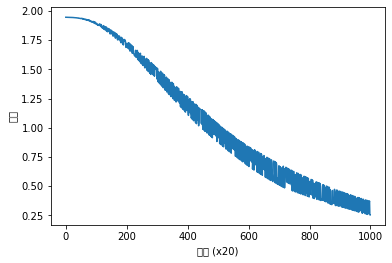

you [-1.0032538   1.0044252  -1.0732161  -0.22482206 -0.15398198]
say [-0.3308403  0.7491067 -1.2087601 -0.6209273 -0.600986 ]
goodbye [ 1.2164646 -1.1954952 -0.9007778 -1.0411469 -1.0248629]
and [-0.23856331 -0.02146691  0.85426074 -1.0503486  -1.0600946 ]
i [-0.96464366  0.94889313  1.1071011  -0.82503265 -0.8675016 ]
hello [ 0.0157842   0.02925387  0.01852516  0.00546838 -0.02781086]
. [ 0.00810033  0.01745794 -0.00324601  0.0007279  -0.01808502]


In [12]:
# coding: utf-8
window_size = 2
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

print('target :' , target)
print('contexts :' , contexts)


model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])